# 2021-08-26 `oBEo` updates and tests

Results below are for commit: 

(Rerunning the code below for other commits is not guaranteed to give the same results)



## Init

In [1]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

# imports needed to run the simulations
import numpy as np
import commotions
import sc_scenario
from sc_scenario import get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

C:\GITHUB\COMMOTIONSFramework


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:87: UserWarning: N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.
  warnings.warn('N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.')


## Just the base model, no interaction

Same old sanity test.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


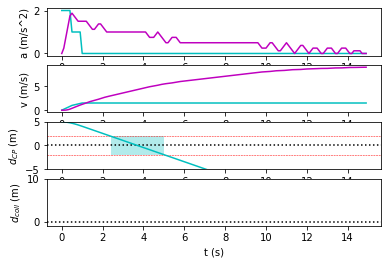

In [2]:
NAMES = ('P', 'V')
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [400, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 0))

optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = True, oBEo = False, oBEv = False, oAI = False, oEA = False)
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True, surplus_action_vals = False)

## Baseline kinematics, base model

And again just confirming that I get back the same results as 2021-06-01.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


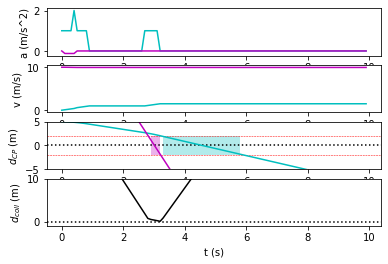

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


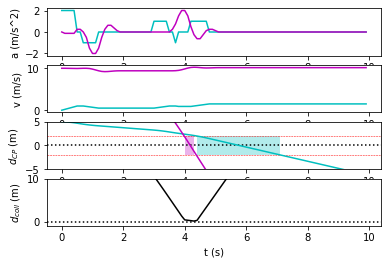

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


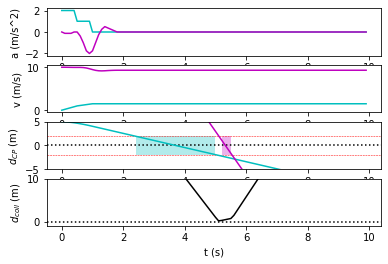

In [3]:
SPEEDS = np.array((0, 10))
PED_Y0 = -5
CONST_ACCS = (None, None)
AFF_VAL_FCN = True
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = False, oAI = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)


def run_baseline_kinematics(dist0s = (30, 40, 50), plot_beh_probs = False, 
                            plot_beh_activs = False, plot_beh_accs = False):
    for dist0 in dist0s:
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = SCSimulation(
                CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = CONST_ACCS, params = params)
        sc_simulation.run()
        print('Initial car distance %d m:' % dist0)
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs, beh_accs = plot_beh_accs)

run_baseline_kinematics()

## An interesting progression of `oBEo`, `oBEv`, and `oAI`

Running the 40 m initial distance simulation, turning on one optional assumption at a time.

### Just `oBEo`

Compared to the base model, the car now becomes jittery about the possibility of the pedestrian walking out in front of it.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


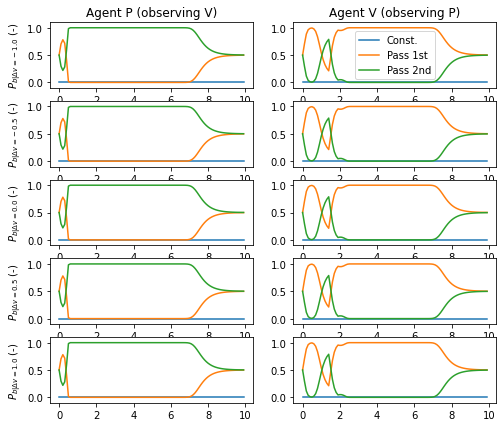

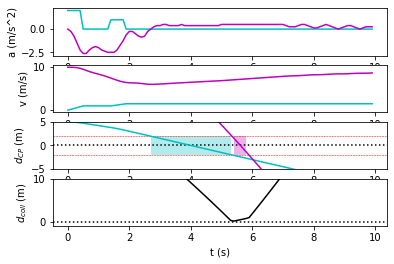

In [4]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = False, oAI = False, oEA = False)

run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

### `oBEo` + `oBEv`

Adding value based behaviour estimation gives the same outcome, just with less initial hesitation - both agents realise even more quickly that "this is what we're doing".

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


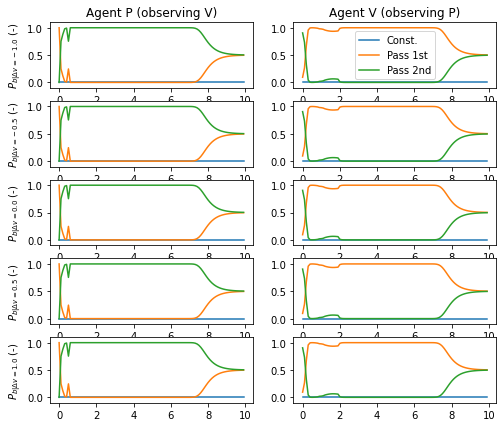

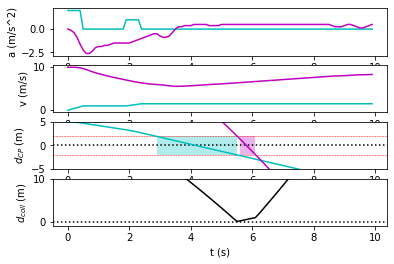

In [5]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True, oAI = False, oEA = False)

run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

### `oBEo` + `oBEv` + `oAI`

Now, interestingly, turning action impact estimation on makes the car very nicely speed up to assert priority.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


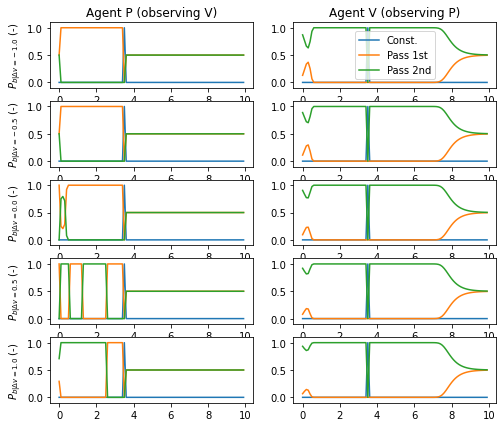

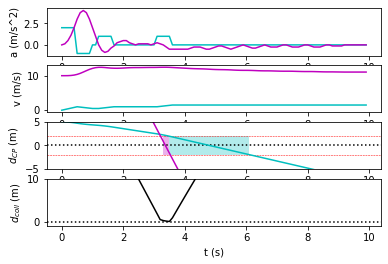

In [6]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True, oAI = True, oEA = False)

run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## A closer look at the behaviour activations

Rerunning the same simulation as above, but also showing the behaviour activations now, to check that the balance between `oBEv` and `oBEo` is reasonable for this default parameterisation, and indeed this seems fine; both the observation-based and value-based activations have an impact on the final activation, without one massively overpowering the other. 

In the second plot, showing the activations for the vehicle agent (observing the pedestrian agent), it's quite hard to tell the different value estimate amplitude apart in the plot, they basically all look the same, regardless of vehicle action. However, if one zooms in, there are differences at the level of a few value points, estimating the value for the pedestrian of passing in 2nd higher than passing 1st, if the vehicle speeds up, and this is indeed what we also see in the simulation.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


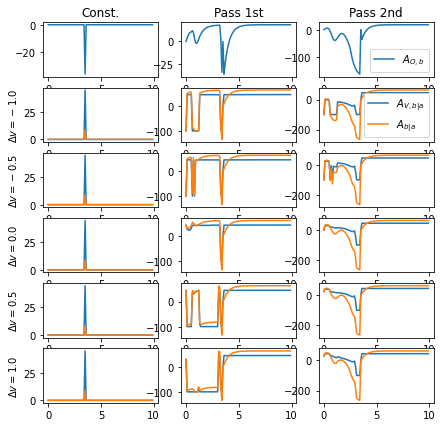

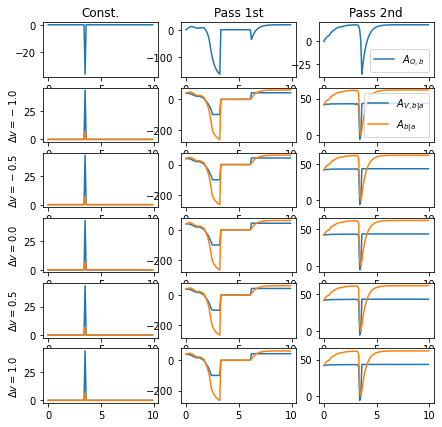

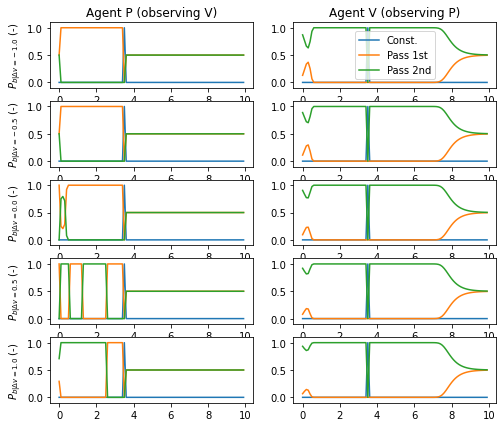

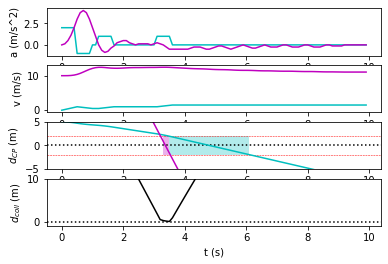

In [7]:
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True, plot_beh_activs = True)

## Enabling `oEA`

I have been thinking that the deterministic simulations in the paper probably all should include `oEA`, to allow extension to probabilistic simulations without too much parameter changes. Doing so, we can now see the accumulative estimates of value also for the other agent (reset to zero at each ego action). The result in this specific case is that the vehicle is not able to react to the early insight that accelerating could encourage the pedestrian to pass in 2nd - the pedestrian instead asserts priority.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


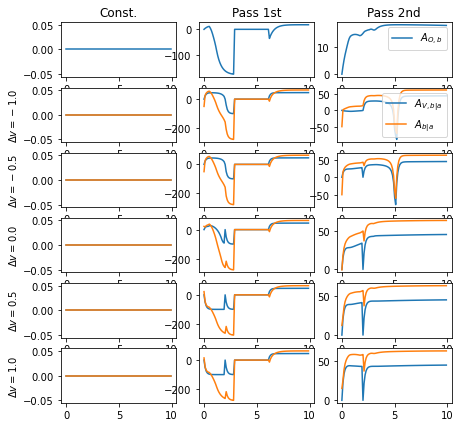

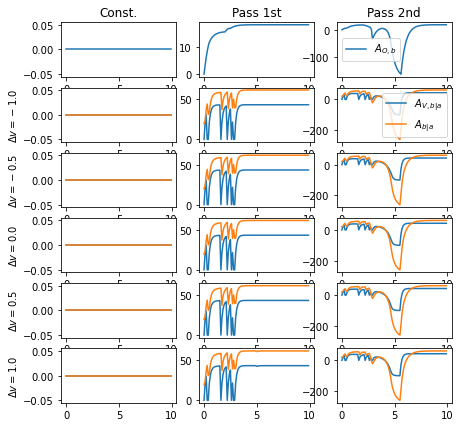

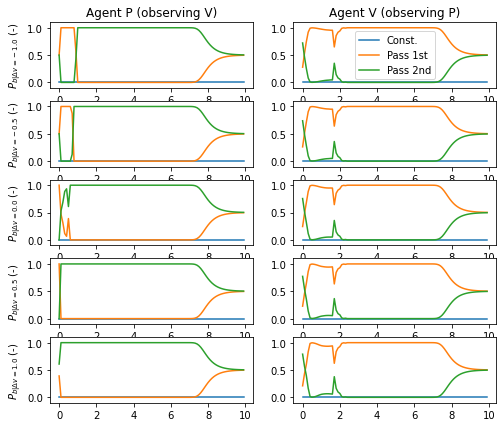

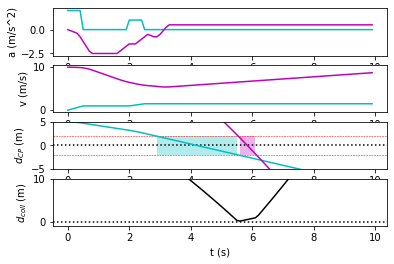

In [11]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True, oAI = True, oEA = True)

run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True, plot_beh_activs = True)

Next: The fixed-acc vehicle yielding scenario from June 1st, to see the effect of oBEo. Then crank up T_P to 1 s - this seems to increase the tendency for the pedestrian to cross once it has decided that the car is yielding.

Also: Cranking up T_P to 1 s and setting V_ny = -30 in the scenario just above here with oEA caused a slightly weird crash where the pedestrian was crossing the road and then decelerates just before having finished crossing, and the car just slammed into it. To investigate! (I am committing with this scenario in the sc_scenario.py __main__) Makes me think I should also test how the agents react to stationary obstacles...